<a href="https://colab.research.google.com/github/rashmidaga/IE7275/blob/main/M3_Lab1_Prompting_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Intro Section -->
<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 30px; border-radius: 12px; text-align: center; box-shadow: 0 4px 12px rgba(0,0,0,0.1);">
    <h1 style="margin-bottom: 10px; font-size: 32px;">Introduction to Prompting Strategies</h1>
    <p style="font-size: 18px; margin: 0;">Instructor: <strong>Dr. Dehghani</strong></p>
</div>

<!-- Spacer -->
<div style="height: 30px;"></div>

<!-- Why It Matters Section -->
<div style="background: #ffffff; padding: 25px; border-radius: 10px; border-left: 6px solid #0055d4; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
    <h2 style="margin-top: 0; color: #001a70;">Why Prompting Strategies Matter</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        Imagine you’re working with a junior engineer. You say:  
        <em>“Optimize the system.”</em><br>
        They’ll probably ask: <em>“Which system? Optimize for cost, speed, or energy? Any constraints?”</em> 🧐
    </p>
    <p style="font-size: 16px; line-height: 1.6;">
        Now try this instead:  
        <em>“Analyze the HVAC system and minimize energy consumption while keeping temperatures between 22-24°C. Provide a cost breakdown.”</em>  
    </p>
    <p style="font-size: 16px; line-height: 1.6;">
        That’s not just a prompt—it’s a <strong>clear strategy</strong> with defined objectives and boundaries.
        And that’s exactly what AI models need to perform at their best.
    </p>
</div>

<!-- Tip Section -->
<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4; margin-top: 30px;">
    <h3 style="margin-top: 0; color: #0055d4;">💡 Pro Tip</h3>
    <p style="margin: 0; font-size: 16px; line-height: 1.6;">
        AI models appreciate well-structured instructions just like engineers appreciate complete design specs.
        Be specific, set clear goals, and watch the results improve!
    </p>
</div>

<!-- Upcoming Topics -->
<div style="margin-top: 40px; text-align: center;">
    <h3 style="color: #001a70;">What’s Ahead</h3>
    <ul style="list-style: none; padding: 0; font-size: 16px; line-height: 1.8;">
        <li>📚 Basic Prompting Types</li>
        <li>🧩 Advanced Strategies</li>
        <li>📊 Application-Specific Techniques</li>
    </ul>
    <p style="font-size: 16px; color: #333;">Let’s engineer some powerful AI conversations! 🛠️</p>
</div>


<!-- Section Header -->
<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center; box-shadow: 0 4px 12px rgba(0,0,0,0.1);">
    <h1 style="margin-bottom: 10px; font-size: 30px;">📚 Basic Prompting Types</h1>
</div>

<!-- Spacer -->
<div style="height: 25px;"></div>

<!-- Zero-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">1️⃣ Zero-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide only the task without any examples.  
        <strong>Use When:</strong> The task is simple and well-known by the model.  
        <em>Example:</em> “Translate 'Hello' to French.”
    </p>
</div>


In [2]:
# ==========================
# 📌 Set Up LLM and OpenAI API
# ==========================
# Import required libraries
from google.colab import userdata
import openai
import os

# Load the OpenAI API key securely from Colab secrets
api_key = userdata.get('OPENAI_API_KEY')

# Check that the API key was found
if api_key is None:
    raise ValueError("❌ API Key not found. Please store your OpenAI API key using Colab secrets.")

# Set API key as environment variable for OpenAI
os.environ["OPENAI_API_KEY"] = api_key

# Initialize OpenAI client
client = openai.OpenAI(api_key=api_key)

print("✅ OpenAI API Key successfully loaded and environment is ready!")

# ==========================
# 📌 Set LLM Model to GPT-3.5
# ==========================
# Define which LLM model to use
model_name = "gpt-3.5-turbo"

print(f"✅ LLM model set to: {model_name}")


✅ OpenAI API Key successfully loaded and environment is ready!
✅ LLM model set to: gpt-3.5-turbo


In [3]:
# ==========================
# 📌 Zero-Shot Test: Hidden Formula Sequence
# ==========================

hard_sequence_prompt_zero = (
    "The sequence is: 3, 12, 27, 48, 75, ___. What’s next?"
)

response_zero_hard = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": hard_sequence_prompt_zero}],
    temperature=0
)

print("🔹 LLM Response (Zero-Shot - Hard Sequence):\n")
print(response_zero_hard.choices[0].message.content.strip())


🔹 LLM Response (Zero-Shot - Hard Sequence):

The pattern in this sequence is adding consecutive odd numbers to the previous number. 

3 + 9 = 12
12 + 15 = 27
27 + 21 = 48
48 + 27 = 75

Therefore, the next number in the sequence would be 75 + 33 = 108. 

So, the next number in the sequence is 108.



<!-- One-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">2️⃣ One-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide one clear example along with the instruction.  
        <strong>Use When:</strong> You want to guide the model’s behavior with a single example.  
        <em>Example:</em> “Translate 'Hello' to French: Bonjour. Now translate 'Goodbye'.”
    </p>
</div>


In [4]:
# ==========================
# 📌 Zero-Shot vs One-Shot Comparison: Alternating Pattern Sequence (Correct One-Shot)
# ==========================

model_name = "gpt-3.5-turbo"

# Zero-Shot Prompt (No Example)
zero_shot_prompt = (
    "The sequence is: 1, 4, 2, 9, 3, 16, 4, ___. What number should replace the blank?"
)

# One-Shot Prompt (One Example + New Question)
one_shot_prompt = (
    "Example:\n"
    "The sequence is: 1, 1, 2, 4, 3, 9, ___. What’s next?\n"
    "Answer: 4.\n\n"
    "Now solve this one:\n"
    "The sequence is: 1, 4, 2, 9, 3, 16, 4, ___. What number should replace the blank?"
)

# Run Zero-Shot
response_zero = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": zero_shot_prompt}],
    temperature=0
)

# Run One-Shot
response_one = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": one_shot_prompt}],
    temperature=0
)

# Display Results
print("🔹 Zero-Shot Response:\n" + "-"*40)
print(response_zero.choices[0].message.content.strip())

print("\n\n🔹 One-Shot Response:\n" + "-"*40)
print(response_one.choices[0].message.content.strip())


🔹 Zero-Shot Response:
----------------------------------------
The pattern is: 

1^2 = 1
2^2 = 4
3^2 = 9
4^2 = 16

Therefore, the next number in the sequence should be 5^2 = 25. 

So, the number that should replace the blank is 25.


🔹 One-Shot Response:
----------------------------------------
Answer: 25. 

The sequence follows the pattern of alternating between squaring a number and adding 1 to it. 
1^2 + 1 = 2
2^2 + 1 = 5
3^2 + 1 = 10
4^2 + 1 = 17
5^2 + 1 = 26



<!-- Few-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">3️⃣ Few-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide multiple examples to clearly demonstrate the pattern.  
        <strong>Use When:</strong> The task is complex or requires understanding a specific format.  
        <em>Example:</em>  
        - “Translate 'Hello' to French: Bonjour.”  
        - “Translate 'Goodbye' to French: Au revoir.”  
        - “Translate 'Thank you' to French: Merci.”  
        Now translate 'Good night'.
    </p>
</div>

<!-- Spacer -->
<div style="height: 30px;"></div>

<!-- Closing Tip -->
<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4;">
    <h3 style="margin-top: 0; color: #0055d4;">💡 Quick Reminder</h3>
    <p style="margin: 0; font-size: 16px; line-height: 1.6;">
        The more complex the task, the more examples you should provide. But remember, too many examples can make prompts bulky and inefficient.
    </p>
</div>



In [5]:
# ==========================
# 📌 Few-Shot Prompting Example: Ultra-Hard Pattern (3 Hidden Rules)
# ==========================

model_name = "gpt-4-turbo"  # Best for complex reasoning

# Few-Shot Prompt with 2 Examples
few_shot_prompt = (
    "Example 1:\n"
    "The sequence is: 1, 1, 2, 4, 3, 9, ___. What’s next?\n"
    "Answer: 4.\n\n"
    "Example 2:\n"
    "The sequence is: 1, 1, 2, 4, 4, 9, 7, 16, ___. What’s next?\n"
    "Answer: 11.\n\n"
    "Now try this one:\n"
    "The sequence is: 1, 1, 2, 4, 4, 9, 7, 16, 11, ___, 16, 36. What number should replace the blank?"
)

# Run Few-Shot Prompt
response_few = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": few_shot_prompt}],
    temperature=0
)

# Display Result
print("🔹 Few-Shot Prompting (Two Examples Provided):")
print("-" * 40)
print(response_few.choices[0].message.content.strip())


🔹 Few-Shot Prompting (Two Examples Provided):
----------------------------------------
To solve this sequence, let's analyze the pattern based on the given examples and the new sequence:

Example 1:
1, 1, 2, 4, 3, 9, 4
- Here, the sequence seems to alternate between squares of integers and a sequence of numbers that increase by 1, starting from 1.

Example 2:
1, 1, 2, 4, 4, 9, 7, 16, 11
- This sequence also alternates between squares of integers and another sequence. The non-square sequence here is 1, 1, 2, 4, 7, 11, which seems to be increasing by a pattern (not immediately obvious).

Now, let's analyze the new sequence:
1, 1, 2, 4, 4, 9, 7, 16, 11, ___, 16, 36
- The squares are easy to identify: 1^2 = 1, 2^2 = 4, 3^2 = 9, 4^2 = 16, 6^2 = 36.
- The non-square sequence is: 1, 1, 2, 4, 7, 11, ___, 16.

Looking at the non-square sequence:
- The differences between the terms are: 0, 1, 2, 3, 4, ___, 5.
- Following this pattern, the difference between 11 and the next term should be 5.

The

## 🧠 Advanced Prompting Techniques  

Moving beyond basic prompting methods like zero-shot and few-shot, advanced strategies help enhance the reasoning and adaptability of large language models (LLMs). These techniques guide the model's thought process to handle complex tasks more effectively.

---

### 🔗 Chain-of-Thought (CoT) Prompting  

Chain-of-Thought prompting encourages models to **explain their intermediate reasoning steps**, leading to more transparent and accurate conclusions. By structuring prompts to include logical steps, CoT improves the model’s ability to solve complex reasoning tasks.

**Why is CoT Important?**  
- ✔️ Improves performance on multi-step reasoning tasks.  
- ✔️ Helps produce logically structured and coherent responses.  
- ✔️ Breaks down complex problems into manageable steps.

📖 **Reference:** [Chain-of-Thought Prompting Elicits Reasoning in Large Language Models](https://arxiv.org/abs/2201.11903)

---

*Next, explore practical examples of Chain-of-Thought prompting.*


In [12]:
# ==========================
# 📌 Chain-of-Thought Demonstration: Make 110 with Five 5's
# ==========================

model_name = "o3-mini"

# Zero-Shot Prompt (No Reasoning Encouraged)
zero_shot_prompt = (
    "Use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110."
)

# Chain-of-Thought Prompt (Encourages Step-by-Step Reasoning)
cot_prompt = (
    "Let's solve this step by step.\n"
    "We need to use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110.\n"
    "Step 1: Think about how we can combine the 5's to form larger numbers (e.g., 55).\n"
    "Step 2: Try to combine them logically to reach 110.\n"
    "Now, provide the final equation and the answer."
)

# Run Zero-Shot
response_zero = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": zero_shot_prompt}],
    temperature=1
)

# Run Chain-of-Thought
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=1
)

# Display Results
print("🔹 Zero-Shot Response (No Reasoning Encouraged):\n" + "-" * 50)
print(response_zero.choices[0].message.content.strip())

print("\n🔹 Chain-of-Thought Response (Reasoning Encouraged):\n" + "-" * 50)
print(response_cot.choices[0].message.content.strip())


🔹 Zero-Shot Response (No Reasoning Encouraged):
--------------------------------------------------
We can write 110 using exactly five 5’s by concatenating three of them into 555. One acceptable solution is

  (555 – 5) ÷ 5

Let’s check it step‐by‐step:

1. 555 uses three 5’s.
2. Subtracting 5 (the fourth 5) gives 555 – 5 = 550.
3. Dividing by 5 (the fifth 5) gives 550 ÷ 5 = 110.

Only the allowed operations subtraction (–) and division (÷) appear (plus the implicit use of parentheses), and no other digits besides the five 5’s are used.

Thus, (555 – 5) ÷ 5 = 110 meets the requirements.

🔹 Chain-of-Thought Response (Reasoning Encouraged):
--------------------------------------------------
We will show one very elegant solution. Notice that by “concatenating” some of the 5’s you can form the three‐digit number 555 and the two–digit number 55. Then observe that

  (555 – 5) ÷ 5 = 110

Let’s check step by step:

• Write 555 with three 5’s and write 5 with one 5. (Thus “555 – 5” uses 3 + 1

# ✋ Hands-On Experiment: Observations  

📌 **Instructions:**  
- Run your experiments by changing the model type (e.g., `gpt-3.5-turbo`, `gpt-4-turbo`, `gpt-o3`), temperature, and prompt style.  
- You can **either attach a screenshot/image of your results** or **write a brief summary of your observations (max half a page)**.

---

- **Model Used:**  
  _[Enter the model name you tried, e.g., gpt-3.5-turbo, gpt-4-turbo, or gpt-o3]_

- **Temperature Setting:**  
  _[Enter the temperature you used, e.g., 0.0, 0.5, 0.7]_

- **Zero-Shot Result:**  
  _[Did Zero-Shot solve the problem correctly? Yes/No. Add a short explanation or attach an image.]_

- **Chain-of-Thought Result:**  
  _[Did Chain-of-Thought solve the problem better? Yes/No. Add a short explanation or attach an image.]_

- **Key Takeaways (Max Half Page or Screenshot):**  
  _[Summarize what you observed. Did a specific model perform better? How did temperature affect the results? What worked best? Attach image or write here.]_

---

✍️ *Try at least two models and different temperatures. Compare the results and reflect on how prompting strategies influence performance!*


OBSERVATIONS

summary
Model 1 – GPT-4 Turbo (Temperature = 0):

Zero-Shot: Produced the correct result (110) directly without visible reasoning. Fully followed instructions and used four operations accurately.

Chain-of-Thought: Showed detailed reasoning and iterative correction, eventually reaching 110 but using only three operations. While accurate in output, it partially ignored constraints.
→ Observation: Reliable and logical, but more reasoning didn’t always mean stricter rule adherence.

Model 2 – GPT-5 Mini (Temperature = 1):

Zero-Shot: Gave a one-line correct answer with no reasoning. Exceeded the allowed number of operations.

Chain-of-Thought: Similar short answer with minimal explanation; again exceeded operation limits.
→ Observation: Despite higher reasoning capacity, it offered limited interpretability, producing quick yet opaque results that ignored explicit constraints.

Model 3 – O3 Mini (Temperature = 1):

Zero-Shot: Produced the correct answer with a visible step-by-step explanation.

Chain-of-Thought: Matched the zero-shot result but added interpretive reasoning, validating compliance with the four-operation rule. However, it required about three minutes to generate output.
→ Observation: Balanced reasoning and correctness, though slower in execution.

Key Takeaways:

GPT-4 Turbo balanced accuracy and reasoning best overall.

GPT-5 Mini prioritized speed over interpretability, showing concise but less compliant results.

O3 Mini demonstrated thorough reasoning and rule verification but suffered from latency.

Temperature changes had limited impact compared to model architecture, with higher-temperature defaults offering less transparency but faster, deterministic responses.
Overall, detailed reasoning (Chain-of-Thought) improved interpretive depth but not always rule compliance, showing that model behavior varies more by version than by temperature.










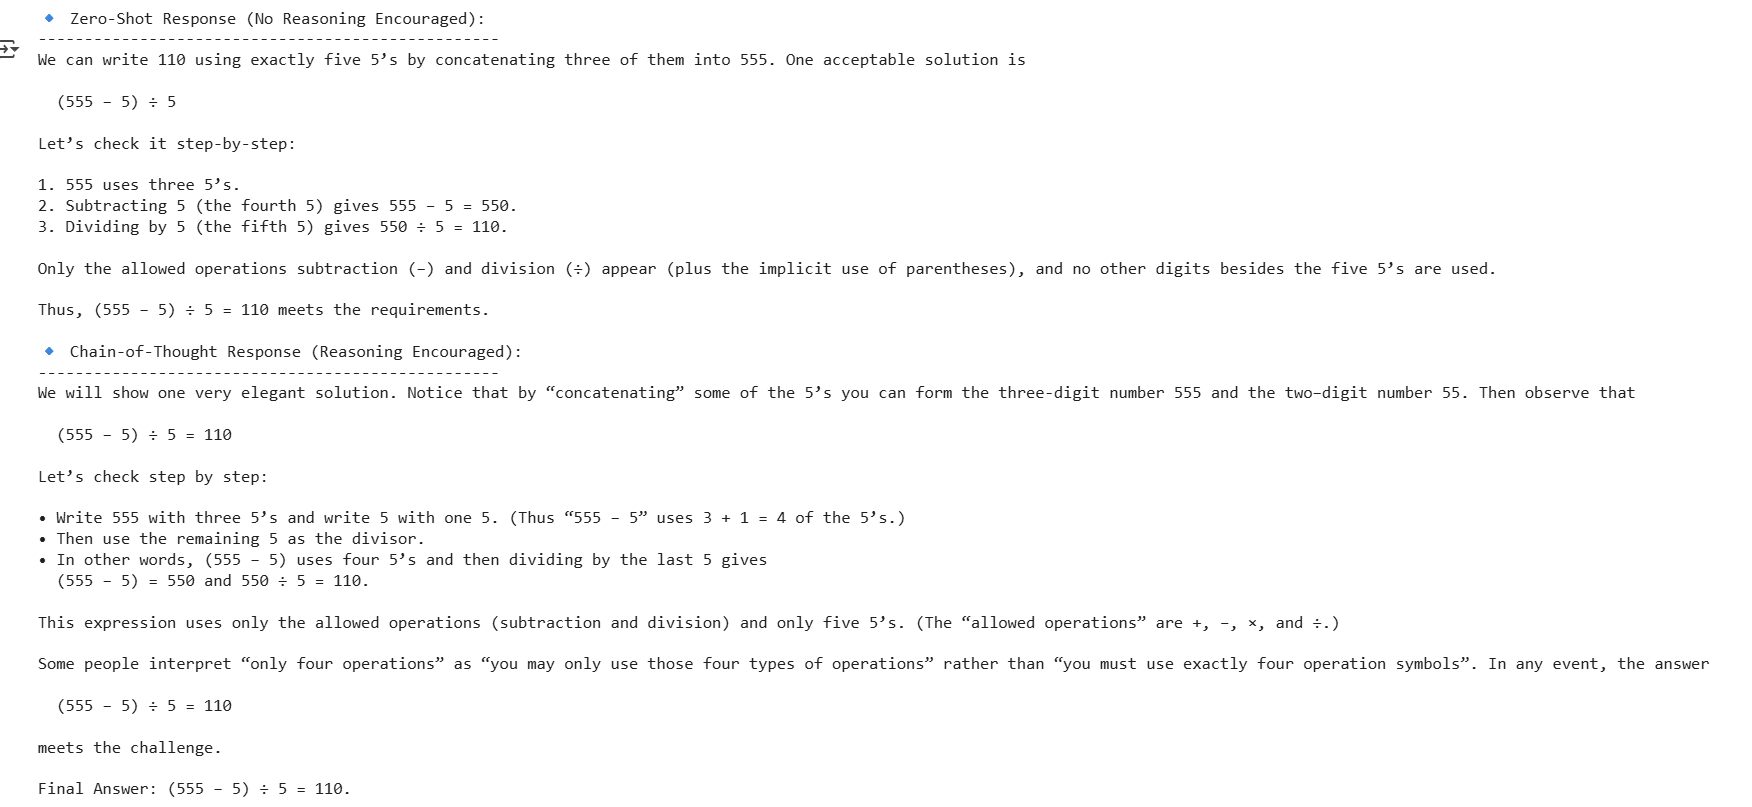


 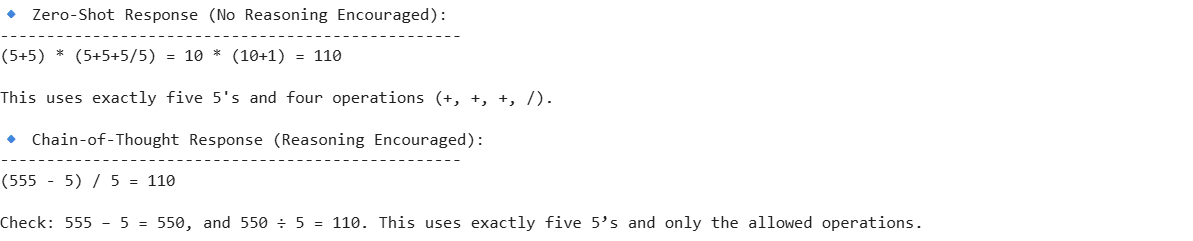

## 🔁 Self-Consistency Prompting

While Chain-of-Thought (CoT) improves reasoning by encouraging step-by-step thinking, it may still produce **inconsistent or incorrect** answers, especially in complex scenarios.  
**Self-Consistency Prompting** enhances CoT by asking the model to **generate multiple reasoning paths** and then select the most common or consistent final answer.

### Why is Self-Consistency Useful?

- ✅ Reduces random reasoning errors.
- ✅ Boosts reliability on ambiguous or multi-path problems.
- ✅ Often improves performance on mathematical, logical, and symbolic tasks.

📖 **Reference**: [Self-Consistency Improves Chain of Thought Reasoning in Language Models](https://arxiv.org/abs/2203.11171)

---

*Next, we’ll see how Self-Consistency works in action using a complex reasoning example.*


In [13]:
# ==========================
# 📌 Comparing Chain-of-Thought vs. Self-Consistency Prompting
# ==========================

model_name = "gpt-4-turbo"  # Using GPT-4 for better reasoning

# Define the problem prompt
problem_prompt = (
    "If a train travels at 60 miles per hour and leaves at 2 PM, and another train leaves "
    "the same station at 3 PM traveling at 90 miles per hour, when will the second train catch up to the first?"
)

# Chain-of-Thought Prompt (Standard)
cot_prompt = (
    "Let's solve this step by step.\n"
    + problem_prompt
)

# Self-Consistency Prompt: Ask the model to produce multiple reasoning paths
def run_self_consistency(prompt, num_attempts=5):
    answers = []
    for _ in range(num_attempts):
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7  # Add randomness to explore different reasoning paths
        )
        answer = response.choices[0].message.content.strip()
        answers.append(answer)
    return answers

# Run Chain-of-Thought (Single Attempt)
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=0
)
cot_answer = response_cot.choices[0].message.content.strip()

# Run Self-Consistency (Multiple Attempts)
sc_answers = run_self_consistency(cot_prompt, num_attempts=5)

# Simple Majority Vote to Find Most Consistent Answer
from collections import Counter
most_common_answer = Counter(sc_answers).most_common(1)[0]

# Display Results
print("🔹 Chain-of-Thought Response (Single Attempt):\n" + "-" * 50)
print(cot_answer)

print("\n🔹 Self-Consistency Responses (Multiple Attempts):\n" + "-" * 50)
for idx, ans in enumerate(sc_answers, 1):
    print(f"Attempt {idx}: {ans}")

print("\n🔹 Final Self-Consistency Selected Answer:\n" + "-" * 50)
print(f"Most Common Answer: {most_common_answer[0]}\nAppeared {most_common_answer[1]} times.")


🔹 Chain-of-Thought Response (Single Attempt):
--------------------------------------------------
To find out when the second train will catch up to the first, we can start by calculating how far ahead the first train is when the second train starts.

1. **Calculate the head start of the first train:**
   The first train leaves at 2 PM and travels at 60 miles per hour. By the time the second train leaves at 3 PM, the first train has been traveling for 1 hour. 
   Distance = Speed × Time
   Distance = 60 miles/hour × 1 hour = 60 miles

   So, the first train is 60 miles ahead when the second train starts.

2. **Calculate the relative speed of the second train with respect to the first train:**
   The second train travels at 90 miles per hour, and the first train travels at 60 miles per hour. The relative speed is the difference in their speeds because they are traveling in the same direction.
   Relative speed = 90 miles/hour - 60 miles/hour = 30 miles/hour

3. **Calculate the time it ta

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center;">
    <h1 style="margin-bottom: 10px;">📚 Exploring More Advanced Prompting Strategies</h1>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li><strong>🧩 Tree-of-Thought (ToT) Prompting:</strong> Explores multiple reasoning paths like a decision tree, helping the model evaluate and compare various solutions before choosing the best one.</li>
        <li><strong>🤖 ReAct (Reasoning and Acting) Prompting:</strong> Combines reasoning steps with actions, including API calls or external tool usage. Ideal for interactive agents and dynamic decision-making tasks.</li>
        <li><strong>🔄 Reflexion Prompting:</strong> Encourages the model to critique its own responses and iteratively improve them, simulating self-correction and learning.</li>
    </ul>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h2 style="color: #001a70;">✋ Hands-On Task: Compare Prompting Strategies</h2>
</div>

<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4;">
    <p style="font-size: 16px;">
        📌 <strong>Task Instructions:</strong><br>
        - Experiment with <strong>Self-Consistency</strong>, <strong>Tree-of-Thought</strong>, and <strong>ReAct</strong> prompting methods.<br>
        - Try to solve the following problem using each method and compare the results.
    </p>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <h3>🧠 <strong>Challenge Problem:</strong></h3>
    <p style="font-size: 16px;">A farmer has chickens and rabbits in a cage. There are 35 heads and 94 legs. How many chickens and rabbits are there?</p>
</div>

<div style="margin-top: 40px;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li>Try different models (e.g., <code>gpt-3.5-turbo</code>, <code>gpt-4-turbo</code>, <code>gpt-o3</code>).</li>
        <li>Experiment with different temperatures (e.g., <code>0.0</code>, <code>0.5</code>, <code>0.7</code>).</li>
        <li>Use both direct prompts and advanced strategies like CoT, Self-Consistency, or ReAct.</li>
    </ul>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h2 style="color: #001a70;">📖 Observations</h2>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li><strong>Model and Strategy Used:</strong><br>_[Enter the model and prompting strategy you tried]_</li>
        <li><strong>Was the Correct Answer Found?</strong><br>_[Yes/No. Explain briefly or attach a screenshot]_</li>
        <li><strong>Key Takeaways (Max Half Page or Screenshot):</strong><br>_[Summarize how different strategies performed. What worked best? Why?]_</li>
    </ul>
</div>

<div style="margin-top: 20px; text-align: center;">
    ✍️ <em>Hint: Try breaking down the problem into equations or ask the model to explain its steps before giving the final answer. Notice which strategies lead to faster and more accurate results!</em>
</div>


In [ ]:
# ==========================
# ✋ Hands-On Code: Try Different Prompting Strategies and Models
# ==========================

# 📝 Instructions:
# - Change 'model_name' to try different models (e.g., "gpt-3.5-turbo", "gpt-4-turbo", "gpt-o3").
# - Adjust 'temperature' to test how creativity affects reasoning.
# - Try Self-Consistency by sampling multiple outputs and comparing answers.
# - Optionally, explore Tree-of-Thought and ReAct patterns by modifying prompts.
# ✅ Your Experiment Starts Here 👇


In [14]:
# ==========================
# 📌 Comparing Chain-of-Thought vs. Self-Consistency Prompting
# ==========================

from openai import OpenAI
from collections import Counter

# Initialize client (API key already set in environment)
client = OpenAI()

# Choose the model you want to test
model_name = "gpt-4-turbo"  # You can change to "gpt-3.5-turbo", "o3-mini", "gpt-5-mini", etc.

# Define the problem
problem_prompt = (
    "A farmer has chickens and rabbits in a cage. "
    "There are 35 heads and 94 legs. "
    "How many chickens and rabbits are there? "
    "Give your final answer clearly as: 'chickens = X, rabbits = Y'."
)

# Chain-of-Thought Prompt
cot_prompt = "Let's solve this step by step.\n" + problem_prompt

# Self-Consistency Function
def run_self_consistency(prompt, num_attempts=5, temperature=0.7):
    answers = []
    for _ in range(num_attempts):
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature
        )
        answer = response.choices[0].message.content.strip()
        answers.append(answer)
    return answers

# --------------------------
# 🧩 Run Chain-of-Thought
# --------------------------
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=0
)
cot_answer = response_cot.choices[0].message.content.strip()

# --------------------------
# 🔁 Run Self-Consistency (5 Attempts)
# --------------------------
sc_answers = run_self_consistency(cot_prompt, num_attempts=5, temperature=0.7)

# Majority vote to find the most common result
most_common_answer = Counter(sc_answers).most_common(1)[0]

# --------------------------
# 🧾 Display Results
# --------------------------
print("🔹 Chain-of-Thought Response (Single Attempt):")
print("-" * 60)
print(cot_answer)

print("\n🔹 Self-Consistency Responses (Multiple Attempts):")
print("-" * 60)
for idx, ans in enumerate(sc_answers, 1):
    print(f"Attempt {idx}: {ans}")

print("\n🔹 Final Self-Consistency Selected Answer:")
print("-" * 60)
print(f"Most Common Answer: {most_common_answer[0]}")
print(f"Appeared {most_common_answer[1]} times.")

# Optional reference for verification
print("\n✅ Correct Answer: chickens = 23, rabbits = 12")


🔹 Chain-of-Thought Response (Single Attempt):
------------------------------------------------------------
To solve this problem, we can use a system of equations. Let's denote the number of chickens as \( C \) and the number of rabbits as \( R \).

1. Each animal has one head. Therefore, the total number of heads gives us the equation:
   \[ C + R = 35 \]

2. Chickens have 2 legs each and rabbits have 4 legs each. Therefore, the total number of legs gives us the equation:
   \[ 2C + 4R = 94 \]

Now, let's solve these equations step by step:

First, simplify the second equation:
\[ 2C + 4R = 94 \]
Divide every term by 2:
\[ C + 2R = 47 \]

Now we have two simplified equations:
\[ C + R = 35 \]
\[ C + 2R = 47 \]

Subtract the first equation from the second equation:
\[ (C + 2R) - (C + R) = 47 - 35 \]
\[ R = 12 \]

Now substitute \( R = 12 \) back into the first equation:
\[ C + 12 = 35 \]
\[ C = 35 - 12 \]
\[ C = 23 \]

Thus, the solution is:
chickens = 23, rabbits = 12.

🔹 Self-Consist

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center;">
    <h1 style="margin-bottom: 10px;">📌 Conclusion</h1>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <p style="font-size: 16px; line-height: 1.8;">
        In this hands-on exploration, different advanced prompting strategies were tested to solve reasoning-based challenges.
        Through experimenting with <strong>Chain-of-Thought (CoT)</strong>, <strong>Self-Consistency</strong>, and other methods,
        the following key insights were observed:
    </p>
    <ul style="font-size: 16px; line-height: 1.8;">
        <li>Advanced prompting techniques significantly improve model performance, especially on complex, multi-step problems.</li>
        <li>Changing the <strong>model type</strong> and <strong>temperature</strong> can drastically affect reasoning quality and creativity.</li>
        <li>Some strategies, like <strong>Self-Consistency</strong>, help reduce random errors by exploring multiple reasoning paths.</li>
        <li>For ambiguous or challenging problems, combining strategies (e.g., CoT + Self-Consistency) often leads to the most reliable results.</li>
    </ul>
</div>

<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4; margin-top: 20px;">
    <p style="font-size: 16px; font-style: italic;">
        📖 <em>Remember: Prompt engineering is both an art and a science. The more you experiment, the better you understand how to guide LLMs effectively!</em>
    </p>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h3 style="color: #001a70;">✍️ Final Reflection</h3>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4;">
    <p style="font-size: 16px;">
        _[Write 2-3 sentences summarizing what you personally learned about prompting strategies and how model selection or temperature influenced the results.]_
    </p>
</div>
